<a href="https://colab.research.google.com/github/VictorDanielPedrozoJerez/VictorDanielPedrozoJerez.github.io/blob/main/Practica1Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Universidad Industrial de Santander**

## Estadística II

### Primer Parcial - Parte II

#### Integrantes:
- **Victor Daniel Pedrozo Jerez** (2202501)


In [ ]:
# Se carga el archivo
from google.colab import files
uploaded = files.upload()

Saving SB11_20231.TXT to SB11_20231 (2).TXT


In [ ]:
# Se agregan las librerias necesarias
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

# Se carga el archivo como csv
datos_icfes = pd.read_csv(io.BytesIO(uploaded['SB11_20231 (2).TXT']), delimiter='¬', engine='python')
print(datos_icfes.head(4))


  ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  \
0                 TI          COLOMBIA           F           04/11/2005   
1                 TI          COLOMBIA           M           08/04/2007   
2                 TI          COLOMBIA           F           26/05/2006   
3                 CC          COLOMBIA           F           24/05/2004   

   PERIODO  ESTU_CONSECUTIVO ESTU_ESTUDIANTE ESTU_PAIS_RESIDE  \
0    20231  SB11202310019049      ESTUDIANTE         COLOMBIA   
1    20231  SB11202310017318      ESTUDIANTE         COLOMBIA   
2    20231  SB11202310030916      ESTUDIANTE         COLOMBIA   
3    20231  SB11202310074169      ESTUDIANTE         COLOMBIA   

  ESTU_DEPTO_RESIDE  ESTU_COD_RESIDE_DEPTO  ... PUNT_INGLES  PERCENTIL_INGLES  \
0      CUNDINAMARCA                     25  ...        87.0              94.0   
1             VALLE                     76  ...         NaN               NaN   
2             VALLE                     76  ...        



*   **Eliminación de valores faltantes** en el análisis estadístico.




In [ ]:
icfes_sin_nan = datos_icfes[(~datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &(~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &(~datos_icfes['PUNT_MATEMATICAS'].isna()) &(~datos_icfes['PUNT_C_NATURALES'].isna()) &(~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &(~datos_icfes['PUNT_INGLES'].isna())]



*   **Selección de variables explicativas a partir de los diagramas de dispersión** entre la variable respuesta y una a una de las variables explicativas




In [ ]:
tabla_regresion=datos_icfes[['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES','ESTU_INSE_INDIVIDUAL']]

Realizaremos histogramas para identificar datos no reprecentativos

In [ ]:
tabla_regresion.head(4)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,ESTU_INSE_INDIVIDUAL
0,100,83,77,77,87.0,67.532814
1,67,58,68,68,NaN,47.223972
2,37,42,35,35,NaN,67.695519
3,45,41,41,27,58.0,41.863163


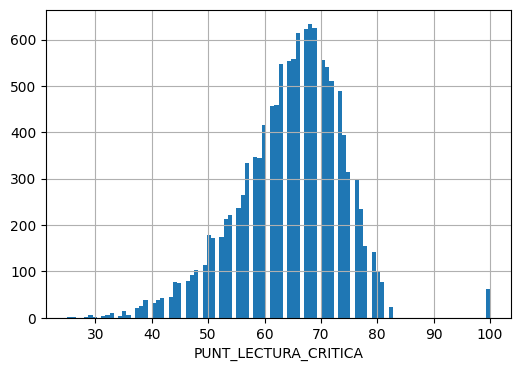

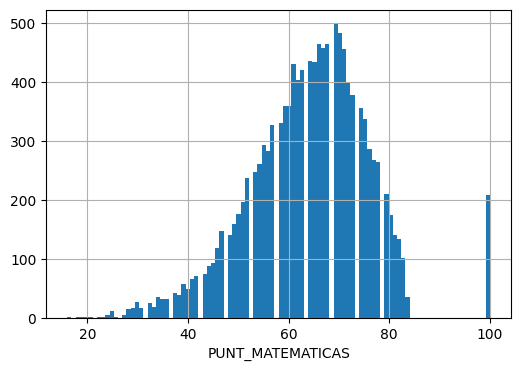

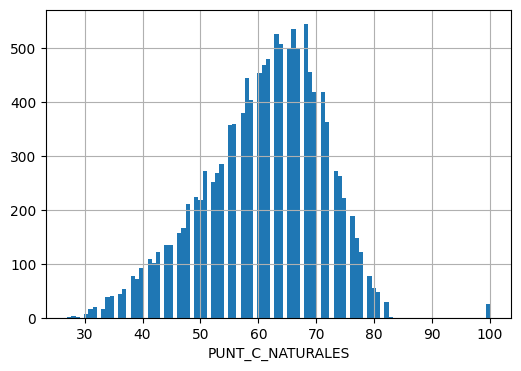

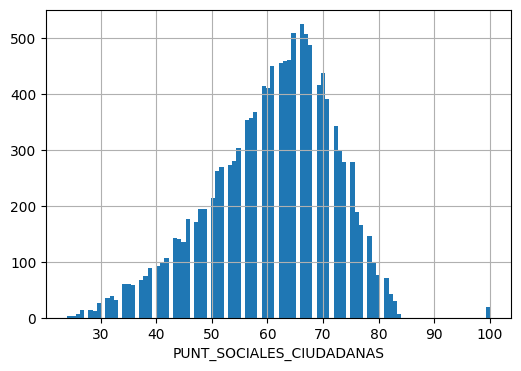

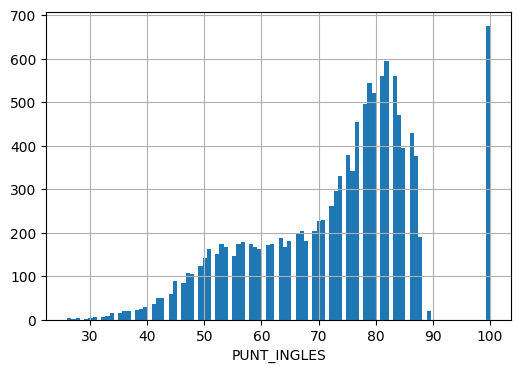

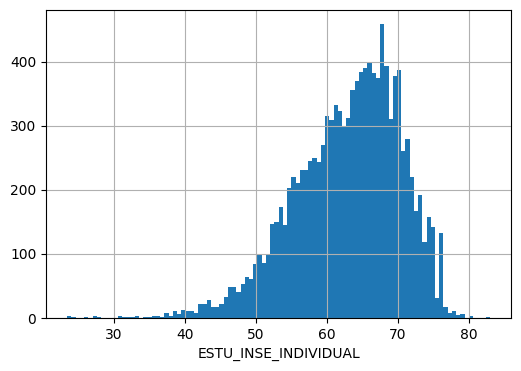

In [ ]:
areas=['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'ESTU_INSE_INDIVIDUAL']

# Graficas de histograamas
for i in areas:
    plt.figure(figsize=(6, 4))
    tabla_regresion[i].hist(bins = 100)
    plt.xlabel(i)

Ajustamos intervalos para no incluir los datos no reprecentativos

In [ ]:
tabla_regresion1 = tabla_regresion[(tabla_regresion["PUNT_LECTURA_CRITICA"] < 90) & (tabla_regresion["PUNT_MATEMATICAS"] < 100) &  (tabla_regresion["PUNT_C_NATURALES"] < 100) &
                                   (tabla_regresion["PUNT_SOCIALES_CIUDADANAS"] < 100) & (tabla_regresion["PUNT_INGLES"] < 100) &
                                    (tabla_regresion["ESTU_INSE_INDIVIDUAL"] < 80)]
tabla_regresion1.head(5)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,ESTU_INSE_INDIVIDUAL
3,45,41,41,27,58.0,41.863163
4,53,55,41,56,69.0,51.223795
5,63,38,60,59,45.0,57.690401
6,69,60,59,51,50.0,39.984838
7,57,68,74,61,52.0,50.613232


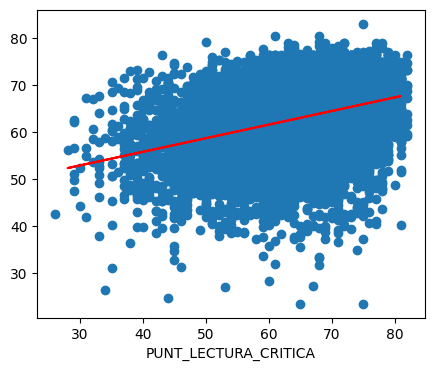

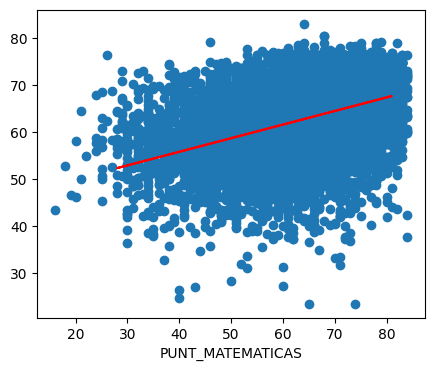

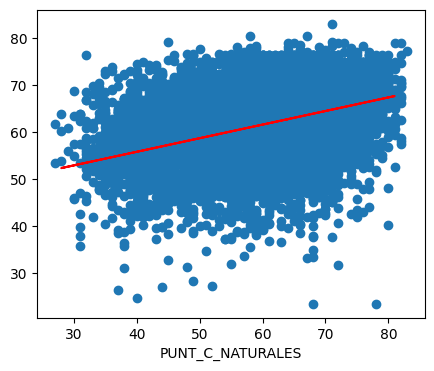

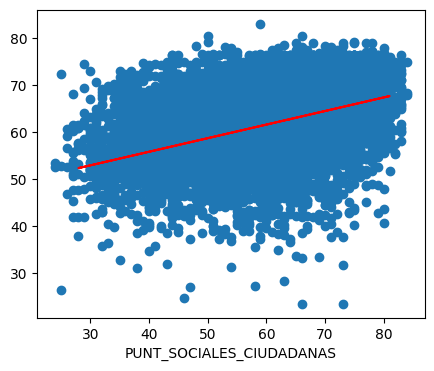

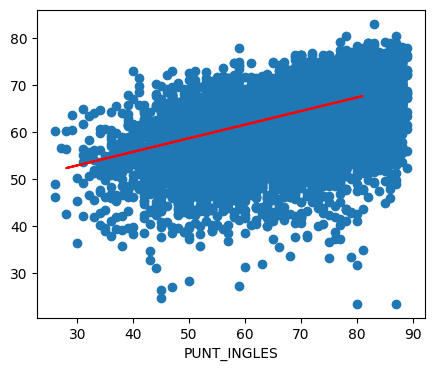

In [ ]:
punts=['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES']


# diagramas de dispercion con linea de regrecion
for i in punts:
  plt.figure(figsize=(5, 4))
  plt.scatter(tabla_regresion1[i], tabla_regresion1["ESTU_INSE_INDIVIDUAL"])
  plt.plot(testx, pred_lineal, linestyle='-', color = "red")
  plt.xlabel(i)
  plt.show()

### Resumen del Análisis del Modelo de Regresión Lineal

1. **Variables del Modelo**:
   - **Variables explicativas (X)**: Puntajes en lectura crítica, matemáticas, ciencias naturales, sociales e inglés.
   - **Variable de respuesta (y)**: Índice socioeconómico del estudiante.

2. **División de Datos**:
   - Los datos se dividen en 80% para entrenamiento y 20% para prueba usando `train_test_split`.

3. **Resultados del Modelo**:
   - **Coeficientes**:
     - **PUNT_LECTURA_CRITICA**: -0.0305 (negativo)
     - **PUNT_MATEMATICAS**: 0.0459 (positivo)
     - **PUNT_C_NATURALES**: -0.0058 (negativo)
     - **PUNT_SOCIALES_CIUDADANAS**: 0.0056 (positivo, muy pequeño)
     - **PUNT_INGLES**: 0.2801 (positivo y fuerte)
   - **Intercepto**: 41.62 (punto donde la línea de regresión cruza el eje Y).
   - **Puntaje R²**: 0.32, lo que significa que el modelo explica el 32% de la variabilidad en el índice socioeconómico.

4. **Análisis**:
   - **PUNT_INGLES** y **PUNT_MATEMATICAS** tienen el mayor impacto positivo en el índice socioeconómico.
   - Los puntajes en lectura crítica y ciencias naturales no tienen un impacto significativo.
   - El valor de R² indica que el modelo tiene un poder predictivo moderado, pero hay espacio para mejoras con otras variables o modelos más avanzados.

Los puntajes en inglés y matemáticas son los principales predictores del índice socioeconómico, pero el modelo tiene una capacidad explicativa limitada.


**Gráfica de la Relación y Regresión Lineal entre Puntaje en Matemáticas y Nivel Socioeconómico**

En esta sección, se visualiza la relación entre el **puntaje en matemáticas** y el **nivel socioeconómico** mediante una gráfica de dispersión. Además, se ajusta y presenta la **recta de regresión lineal** correspondiente, lo que permite observar cómo varía el nivel socioeconómico en función del puntaje en matemáticas.




In [ ]:
X = tabla_regresion1.drop("ESTU_INSE_INDIVIDUAL", axis = 1)
Y = tabla_regresion1["ESTU_INSE_INDIVIDUAL"]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state = 0)
trainX.head(4)

modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(trainX, trainY)
pred_lineal = regresion.predict(testX)

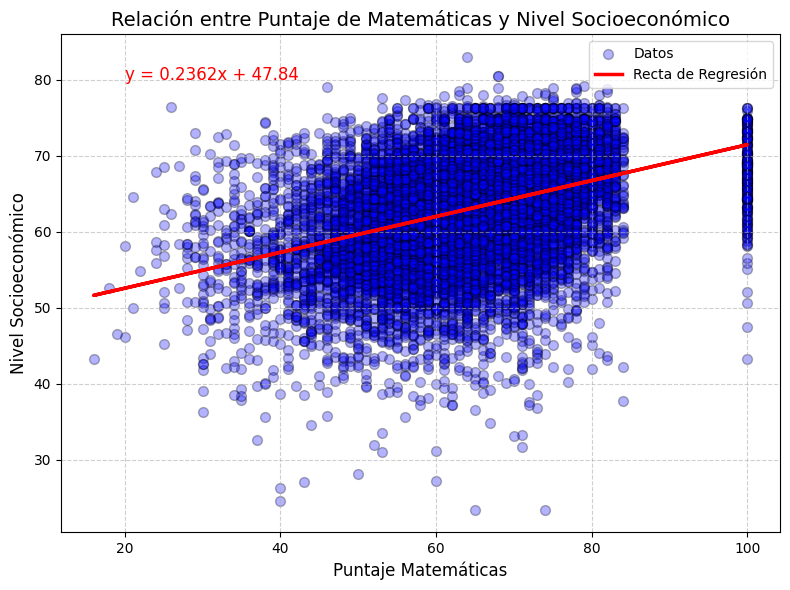

In [ ]:


# Definir las variables
X = icfes_sin_nan[['PUNT_MATEMATICAS']]
y = icfes_sin_nan['ESTU_INSE_INDIVIDUAL']

# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Predecir valores usando el modelo ajustado
y_pred = modelo.predict(X)

# Coeficientes de la regresión lineal
slope = modelo.coef_[0]  # Pendiente
intercept = modelo.intercept_  # Intercepto

# Crear el gráfico
plt.figure(figsize=(8, 6))

# Gráfico de dispersión con más transparencia y ajuste de tamaño de los puntos
plt.scatter(X, y, label='Datos', color='blue', alpha=0.3, edgecolor='black', s=50)

# Dibujar la recta de regresión
plt.plot(X, y_pred, color='red', label='Recta de Regresión', linewidth=2.5)

# Añadir la ecuación de la recta en el gráfico
equation_text = f'y = {slope:.4f}x + {intercept:.2f}'
plt.text(20, 80, equation_text, fontsize=12, color='red')

# Etiquetas y título
plt.title('Relación entre Puntaje de Matemáticas y Nivel Socioeconómico', fontsize=14)
plt.xlabel('Puntaje Matemáticas', fontsize=12)
plt.ylabel('Nivel Socioeconómico', fontsize=12)

# Mostrar la leyenda y ajustar el gráfico
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Análisis de la Relación entre Puntaje de Matemáticas y Nivel Socioeconómico

La gráfica muestra la relación entre el **puntaje en matemáticas** y el **nivel socioeconómico** con una **regresión lineal** de ecuación:

\[
y = 0.2362x + 47.84
\]

#### 1. Interpretación de la Pendiente
Por cada punto adicional en matemáticas, el nivel socioeconómico aumenta en **0.236 unidades**. Esto indica una **relación positiva** entre ambas variables, aunque el impacto es moderado.

#### 2. Intercepto
Un puntaje de **0** en matemáticas se asociaría con un nivel socioeconómico de **47.84**. Este valor es teórico, ya que es poco probable tener puntaje de 0.

#### 3. Distribución y Ajuste
Existe una **dispersión considerable** alrededor de la recta, lo que sugiere que el puntaje en matemáticas no explica completamente el nivel socioeconómico. Es probable que otros factores influyan en la variabilidad de los datos.

#### 4. Conclusión
- **Relación positiva**, pero moderada.
- **Otros factores** afectan el nivel socioeconómico.
- El modelo lineal no captura toda la variabilidad, lo que sugiere la posibilidad de modelos más complejos para mejorar el ajuste.




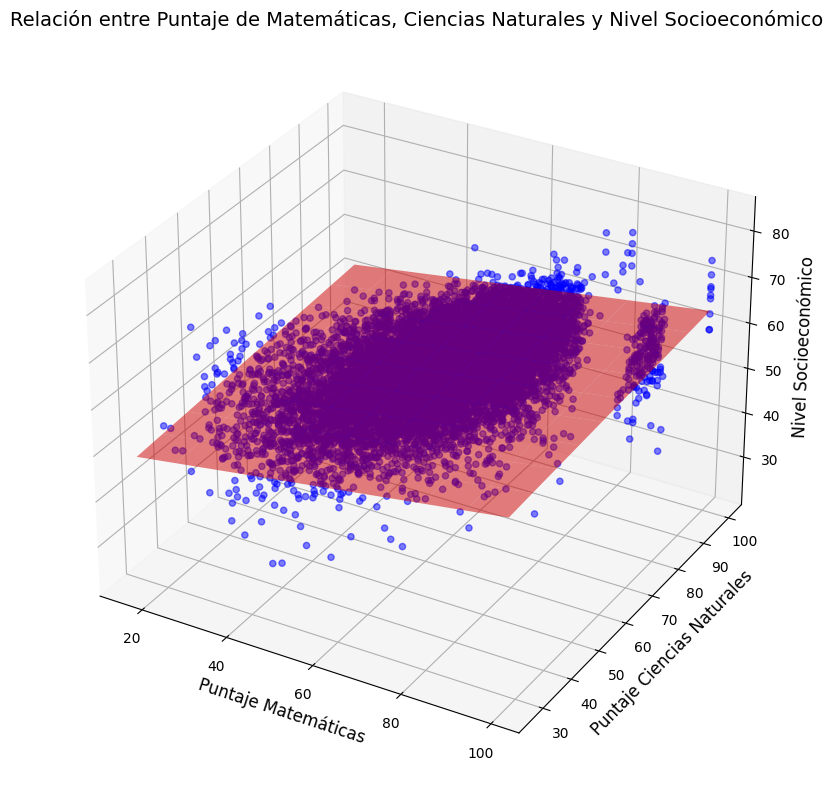

In [ ]:
# Definir las variables
X = icfes_sin_nan[['PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS']]
y = icfes_sin_nan['ESTU_INSE_INDIVIDUAL']

# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Predecir valores usando el modelo ajustado
y_pred = modelo.predict(X)

# Coeficientes de la regresión lineal
coeficientes = modelo.coef_  # Coeficientes
intercepto = modelo.intercept_  # Intercepto

# Crear el gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Gráfico de dispersión de los datos originales
ax.scatter(X['PUNT_MATEMATICAS'], X['PUNT_C_NATURALES'], y, label='Datos', color='blue', alpha=0.5)

# Crear una malla de puntos para el plano
x_range = np.linspace(X['PUNT_MATEMATICAS'].min(), X['PUNT_MATEMATICAS'].max(), 10)
y_range = np.linspace(X['PUNT_C_NATURALES'].min(), X['PUNT_C_NATURALES'].max(), 10)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)

# Calcular los valores de z (nivel socioeconómico) para el plano
z_mesh = intercepto + coeficientes[0] * x_mesh + coeficientes[1] * y_mesh

# Dibujar el plano de regresión
ax.plot_surface(x_mesh, y_mesh, z_mesh, color='red', alpha=0.5)

# Etiquetas y título
ax.set_title('Relación entre Puntaje de Matemáticas, Ciencias Naturales y Nivel Socioeconómico', fontsize=14)
ax.set_xlabel('Puntaje Matemáticas', fontsize=12)
ax.set_ylabel('Puntaje Ciencias Naturales', fontsize=12)
ax.set_zlabel('Nivel Socioeconómico', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# Conclusiones del Gráfico 3D: Relación entre Puntaje de Matemáticas, Ciencias Naturales y Nivel Socioeconómico

## Descripción del Gráfico:
El gráfico muestra una relación entre tres variables clave:
- **Eje X**: Puntaje en Matemáticas.
- **Eje Y**: Puntaje en Ciencias Naturales.
- **Eje Z**: Nivel Socioeconómico (ESTU_INSE_INDIVIDUAL).

El gráfico incluye un **plano de regresión** (en color rojo), que modela la relación lineal entre las variables de puntaje y el nivel socioeconómico.

## Observaciones:
1. **Distribución de los Puntos**:
   - Existe una gran concentración de puntos en un rango medio de nivel socioeconómico (alrededor de 40-70 en el eje Z).
   - La mayoría de los estudiantes con puntajes más altos en Matemáticas y Ciencias Naturales (80-100 en los ejes X e Y) parecen ubicarse también en niveles socioeconómicos medios o altos.
   - Los estudiantes con puntajes más bajos en ambas materias tienden a estar en niveles socioeconómicos más bajos.

2. **Tendencia del Plano de Regresión**:
   - El plano de regresión (superficie roja) sugiere una relación positiva entre los puntajes en Matemáticas, Ciencias Naturales y el nivel socioeconómico.
   - Esto implica que, en promedio, los estudiantes con puntajes más altos en estas dos áreas tienden a pertenecer a niveles socioeconómicos más altos.

3. **Variabilidad en los Datos**:
   - Aunque existe una correlación positiva, también se observa una alta variabilidad en los datos, especialmente en los niveles medios de puntajes, lo que indica que no todos los estudiantes con niveles socioeconómicos medios presentan puntajes elevados o bajos de forma consistente.

## Conclusiones:
1. **Relación Positiva**:
   - Existe una relación positiva entre los puntajes en Matemáticas y Ciencias Naturales con el nivel socioeconómico. Esto sugiere que, en general, un nivel socioeconómico más alto está asociado con un mejor desempeño académico en estas áreas.

2. **Factores Sociales y Económicos**:
   - Los resultados podrían indicar que los estudiantes de niveles socioeconómicos más altos tienen acceso a mejores recursos educativos o apoyo académico, lo que se refleja en su rendimiento en exámenes.

3. **Limitaciones del Modelo**:
   - A pesar de la relación positiva observada, la gran dispersión de los puntos indica que el nivel socioeconómico no es el único factor que afecta el rendimiento académico. Otros factores no representados en este gráfico también podrían estar influyendo.

---

Este análisis sugiere que aunque el nivel socioeconómico tiene un impacto notable en el desempeño académico en Matemáticas y Ciencias Naturales, la relación no es determinista, y otros factores deben ser considerados para una comprensión más completa.




*   **Modelo de red neuronal de perceptrón multicapa**




In [ ]:
icfes_connan = datos_icfes[(datos_icfes['ESTU_INSE_INDIVIDUAL'].isna()) &
 (~datos_icfes['PUNT_LECTURA_CRITICA'].isna()) &
 (~datos_icfes['PUNT_MATEMATICAS'].isna()) &
 (~datos_icfes['PUNT_C_NATURALES'].isna()) &
 (~datos_icfes['PUNT_SOCIALES_CIUDADANAS'].isna()) &
 (~datos_icfes['PUNT_INGLES'].isna())]

X = tabla_regresion1.drop("ESTU_INSE_INDIVIDUAL", axis = 1)
red = MLPRegressor(hidden_layer_sizes=(100,100,100,100, 100, 100),
 max_iter = 500,
 activation = 'relu',
 solver = 'adam',
 learning_rate = 'invscaling')
red.fit(testX,testY)
print("coeficiente de determinacion en modelo de red:",red.score(testX,testY))
print("coeficiente de determinacion en modelo de regresion:",regresion.score(testX, testY))
#


coeficiente de determinacion en modelo de red: 0.2957917811708304
coeficiente de determinacion en modelo de regresion: 0.2962348737142402


prediccion de valore no observados

In [ ]:
X.head(5)

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES
3,45,41,41,27,58.0
4,53,55,41,56,69.0
5,63,38,60,59,45.0
6,69,60,59,51,50.0
7,57,68,74,61,52.0


In [ ]:
no_obs=np.array([[50,50,50,50,50]])
print("se espera que el nivel socioeconómico del evaluado sea",red.predict(no_obs),"bajo el modelo de red y",modelo_lineal.predict(no_obs),"bajo el modelo de reegresion")

se espera que el nivel socioeconómico del evaluado sea [51.56544123] bajo el modelo de red y [55.83008194] bajo el modelo de reegresion


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Conclusiones: Modelo de Red Neuronal de Perceptrón Multicapa (MLPRegressor)

## Descripción del Modelo:
El modelo utilizado es un **Perceptrón Multicapa (MLPRegressor)** con las siguientes configuraciones:
- **Capas ocultas**: Seis capas con 100 neuronas cada una.
- **Máximo de iteraciones**: 500.
- **Función de activación**: ReLU.
- **Optimizador**: Adam.
- **Tasa de aprendizaje**: Escalamiento inverso (invscaling).

El objetivo del modelo es predecir el nivel socioeconómico (**ESTU_INSE_INDIVIDUAL**) a partir de los puntajes en diferentes áreas del examen (Matemáticas, Ciencias Naturales, Sociales, etc.).

## Resultados de los Modelos
- **Coeficiente de determinación (R²) para el modelo de red neuronal**: 0.2958
- **Coeficiente de determinación (R²) para el modelo de regresión lineal**: 0.2962

### Interpretación de los R²
Los coeficientes de determinación **R² = 0.2958** para la red neuronal y **R² = 0.2962** para la regresión lineal indican que ambos modelos explican aproximadamente el **29.58%** y **29.62%** de la variabilidad en el nivel socioeconómico, respectivamente. Esto sugiere que la capacidad predictiva de ambos modelos es similar y relativamente baja.

## Conclusiones
1. **Capacidad Predictiva Limitada**:
   - Ambos modelos tienen una capacidad explicativa similar, lo que indica que aunque los puntajes académicos tienen alguna correlación con el nivel socioeconómico, no son suficientes por sí solos para capturar la variabilidad en esta variable.

2. **Comparación de Modelos**:
   - La similitud en los valores de R² sugiere que la complejidad adicional del modelo de red neuronal no ha proporcionado un aumento significativo en la capacidad predictiva respecto al modelo de regresión lineal. Esto plantea interrogantes sobre la necesidad de utilizar modelos más complejos si no se obtienen mejoras en el rendimiento.

3. **Posibles Mejoras en los Modelos**:
   - **Ajuste de Hiperparámetros**: Para el modelo de red neuronal, se pueden explorar ajustes en la arquitectura y los hiperparámetros (como la tasa de aprendizaje y el número de neuronas) para intentar mejorar el rendimiento.
   - **Incorporación de Nuevas Variables**: La inclusión de variables adicionales que puedan influir en el nivel socioeconómico, como datos demográficos o socioeconómicos, podría ayudar a mejorar la capacidad predictiva de los modelos.
   - **Técnicas de Regularización**: Implementar técnicas de regularización en el modelo de red neuronal podría ayudar a prevenir el sobreajuste y mejorar la generalización del modelo.

4. **Limitaciones del Enfoque**:
   - **Complejidad del Problema**: El nivel socioeconómico es un fenómeno complejo influenciado por múltiples factores. La baja capacidad explicativa de ambos modelos indica que podrían estar faltando importantes variables en el análisis.
   - **Variabilidad No Capturada**: Es probable que otros factores no considerados en los modelos tengan un impacto significativo en el nivel socioeconómico, lo que limita la efectividad de los modelos actuales.

## Resumen Final
Ambos modelos muestran que existe una relación entre los puntajes académicos y el nivel socioeconómico, pero la capacidad para predecir con precisión este último es limitada. Esto sugiere la necesidad de explorar más a fondo los datos y considerar la implementación de modelos más complejos o el uso de diferentes enfoques para mejorar el desempeño predictivo.

In [ ]:

!jupyter nbconvert --to pdf '/content/drive/My Drive/Estadistica/Practica1Estadistica.ipynb

/bin/bash: -c: line 1: unexpected EOF while looking for matching `''
/bin/bash: -c: line 2: syntax error: unexpected end of file
